In [1]:
# KOLMINKERTAINEN EKSPONENTIAALINEN TASOITUSMALLI

# HUOMIOI SEKÄ TRENDIN ETTÄ KAUSIVAIHTELUN. 

# Kolminkertaista eksponentiaalista tasoitusta kutsutaan myös Holt-Winterin malliksi. Eksponentiaalisen tasoituksen 
# mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän 
# ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.

# Holt-Winterin malli huomioi sekä trendin että kausivaihtelun.
# Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df=pd.read_excel('Saapuneet puhelut viikkotasolla.xlsx')
df

,Date,Saapuneet
0,2017-12-10,663
1,2017-12-17,941
2,2017-12-24,658
3,2017-12-31,1206
4,2018-01-07,991
...,...,...
166,2021-02-14,3353
167,2021-02-21,7303
168,2021-02-28,4699
169,2021-03-07,4666


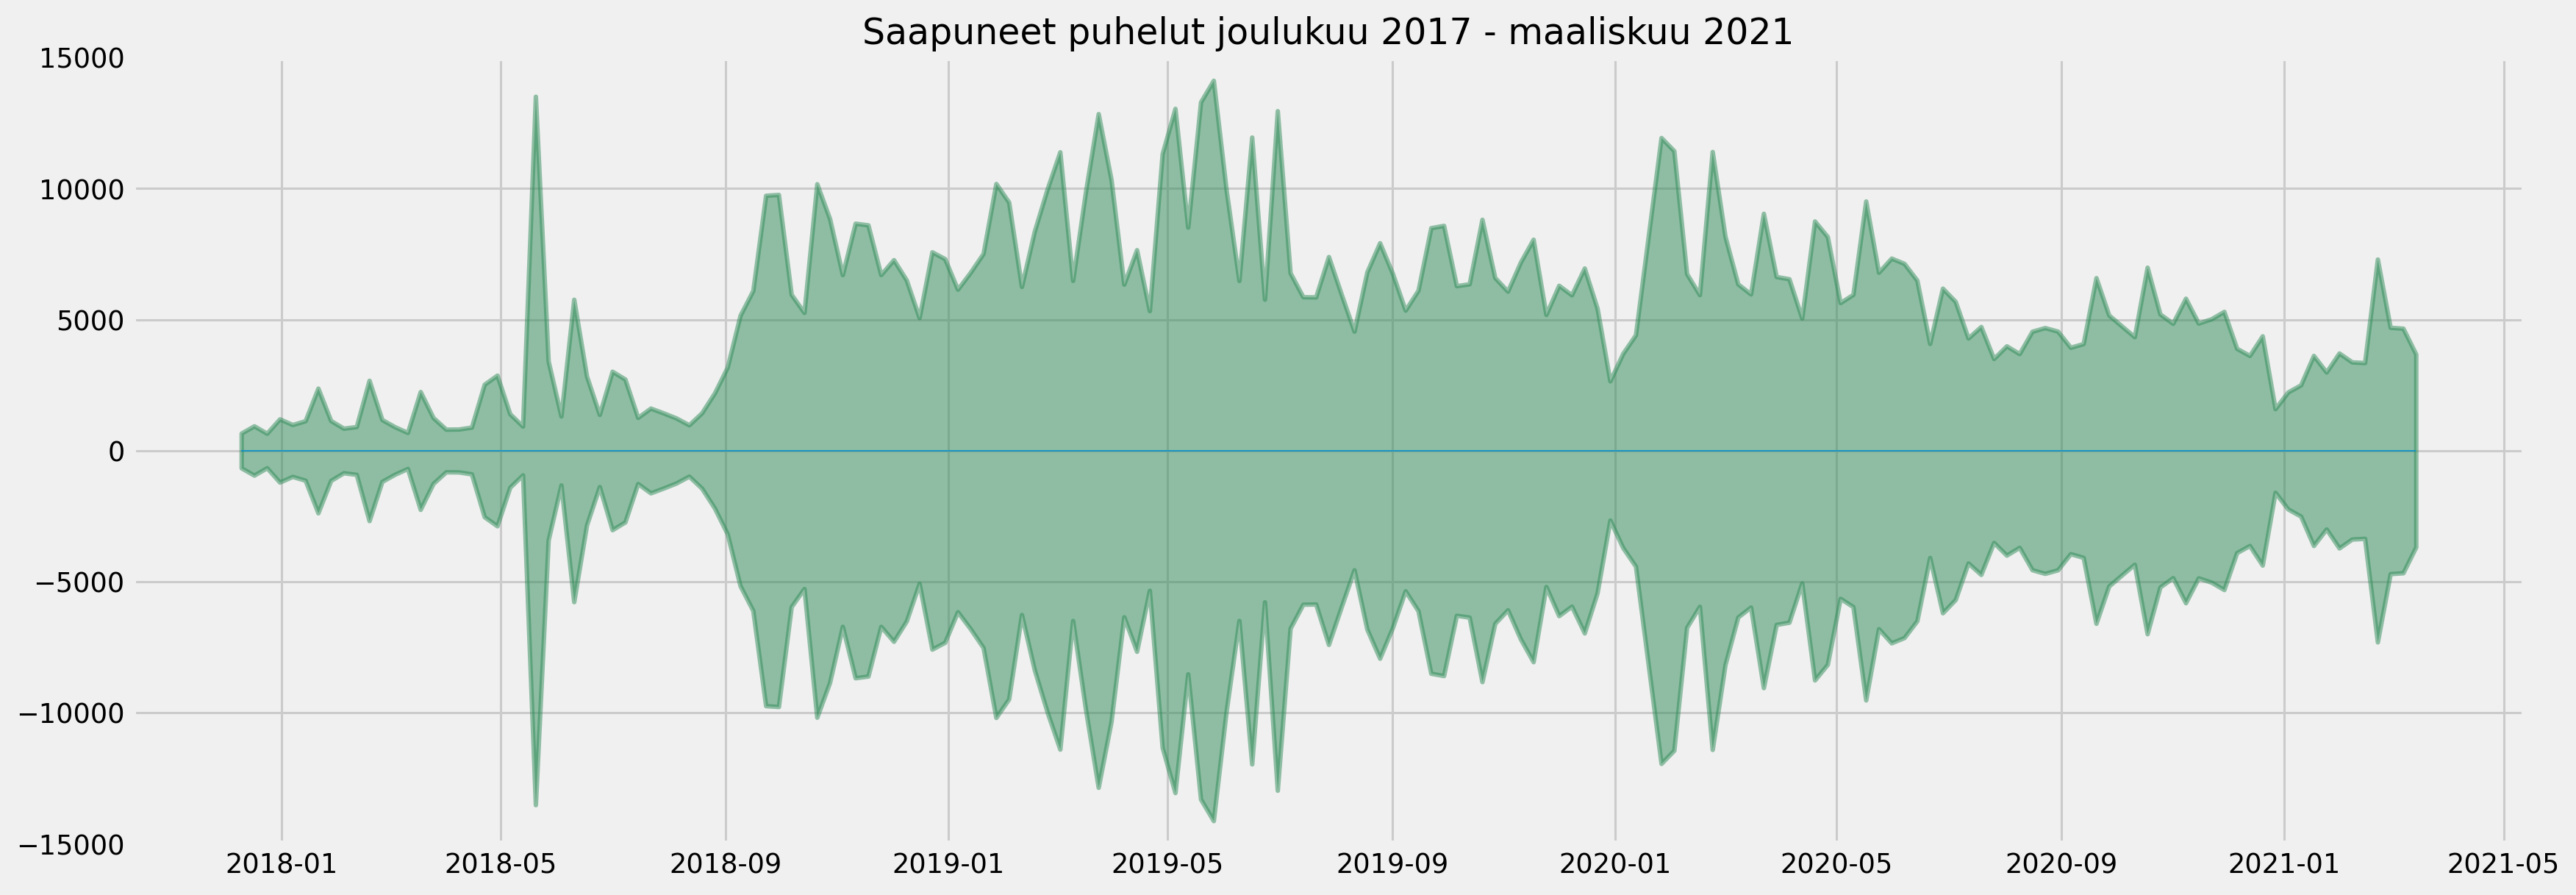

In [3]:
# Visualisointi
x = df['Date'].values
y1 = df['Saapuneet'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(17,6), dpi= 220)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-15000, 15000)
plt.title('Saapuneet puhelut joulukuu 2017 - maaliskuu 2021', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Date), xmax=np.max(df.Date), linewidth=.5)
plt.show()

In [4]:
df.index = pd.to_datetime(df['Date'],format="%Y-%m")
df=df.drop('Date',axis=1)
df

,Saapuneet
Date,
2017-12-10,663
2017-12-17,941
2017-12-24,658
2017-12-31,1206
2018-01-07,991
...,...
2021-02-14,3353
2021-02-21,7303
2021-02-28,4699


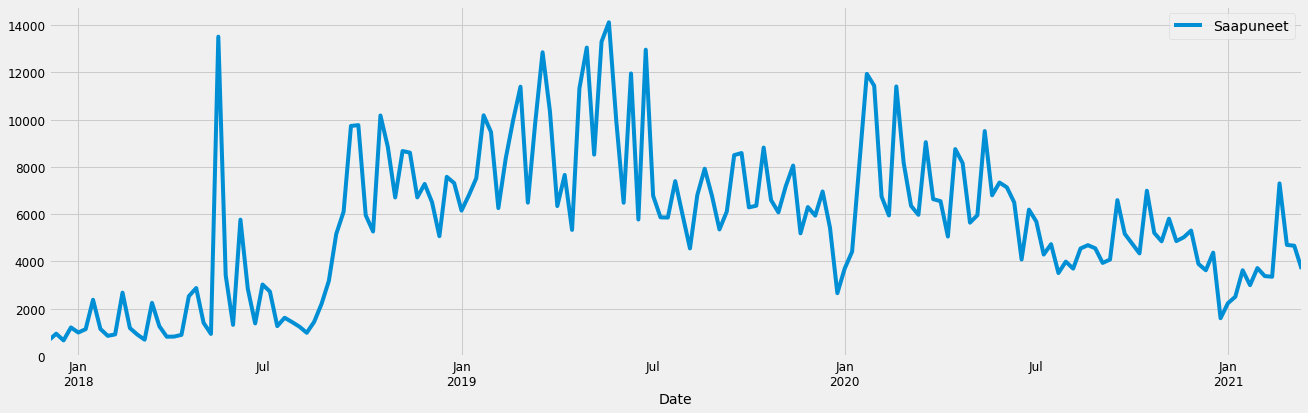

In [5]:
# Visualizing Time Series Data
df.plot(figsize=(20, 6))
plt.show()

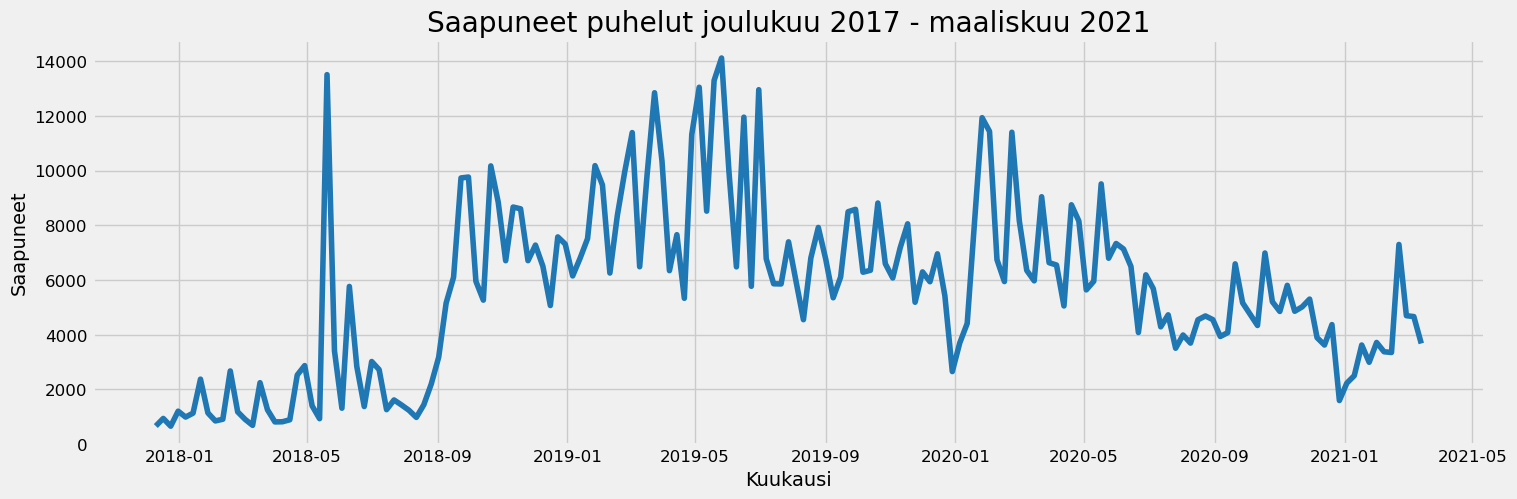

In [6]:
# Visualisoidaan vielä
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Kuukausi', ylabel='Saapuneet', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.Saapuneet, title='Saapuneet puhelut joulukuu 2017 - maaliskuu 2021')

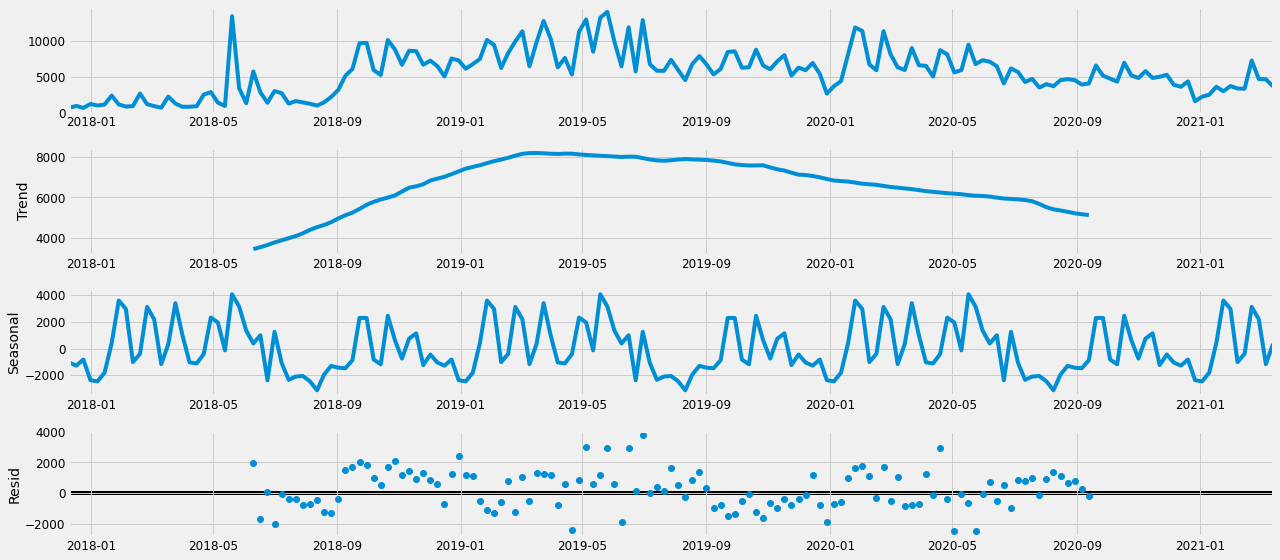

In [7]:
# Aikasarjan vaihtelua aiheuttavien komponenttien erottelu
# Observed=alkuperäinen aikasarja, Trend=trendi, Seasonal=kausivaihtelu,
# Residual=muu kuin trendiin ja kausivaihteluun liittyvä vaihtelu

# Tuloksena saan neljä kuviota:
# alkuperäinen aikasarja
# aikasarjasta erotettu trendi
# aikasarjan kausivaihtelu
# aikasarjan jäljelle jäänyt osa trendin ja kausivaihtelun poistamisen jälkeen.

# Visualizing Time Series Data
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

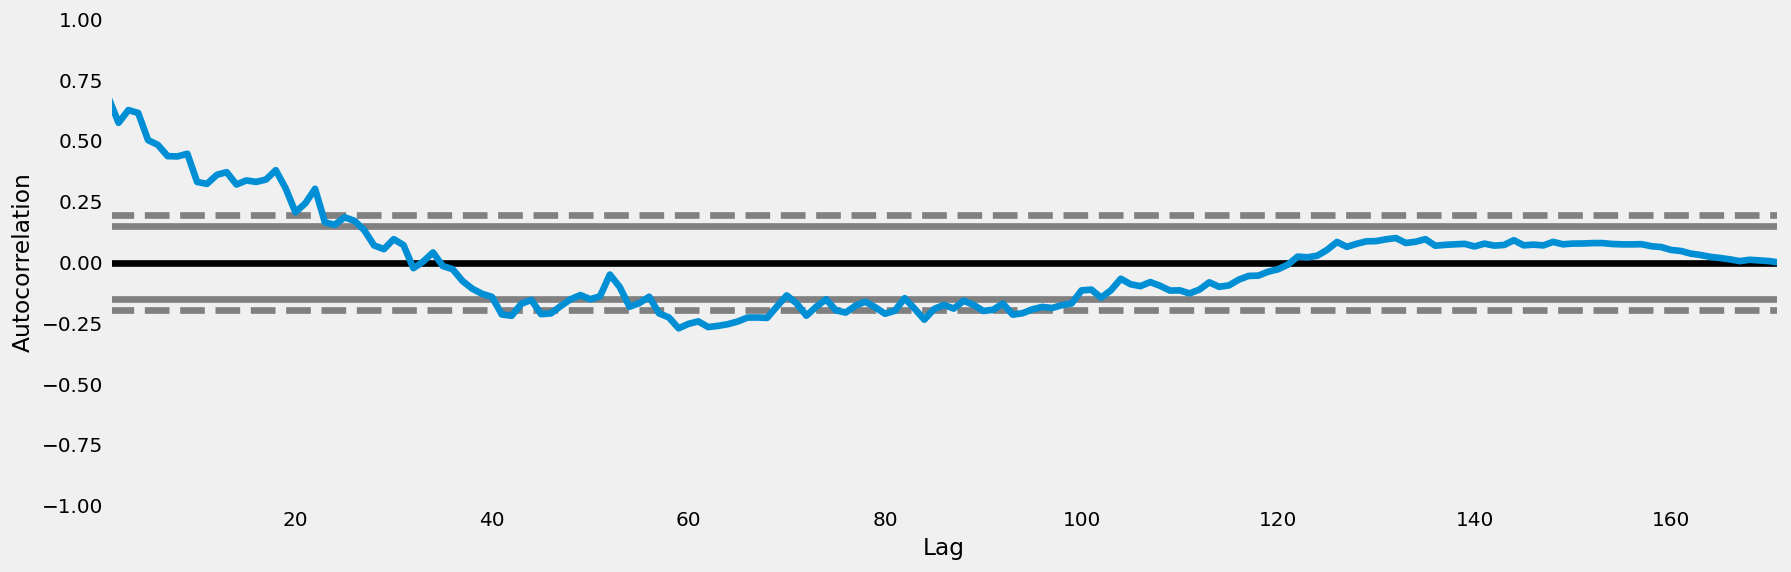

In [8]:
# Kausittaisuuden testaus
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(16,5), 'figure.dpi':120})
autocorrelation_plot(df.Saapuneet.tolist())

In [9]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#Trendiin (trend) käytän summamallia (add), jossa trendi on aikasarjaan lisättävä termi. Tämä on suositeltavin vaihtoehto.
#Kausivaihteluun (seasonal) käytän summamallia (add) tai tulomallia (mul). Tulomallissa kausivaihtelu ilmenee kertoimina. Tässä olen kokeillut myös summamallia, mutta tulomalli osoittautui paremmaksi.
#seasonal_periods-parametrille käytän arvoa 20, koska kausivaihtelu esiintyy 20 viikon jaksoissa.
#freq-parametrille käytän arvoa 'W', koska kyseessä on viikkodata. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], trend = 'add', seasonal = 'mul', 
                             seasonal_periods = 20, freq='W').fit()

In [10]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Saapuneet,Ennuste
Date,,
2017-12-10,663,673.756482
2017-12-17,941,970.917299
2017-12-24,658,688.750824
2017-12-31,1206,1279.651994
2018-01-07,991,1065.156498
...,...,...
2021-02-14,3353,5332.659250
2021-02-21,7303,5002.027833
2021-02-28,4699,4580.842960


<AxesSubplot:xlabel='Date'>

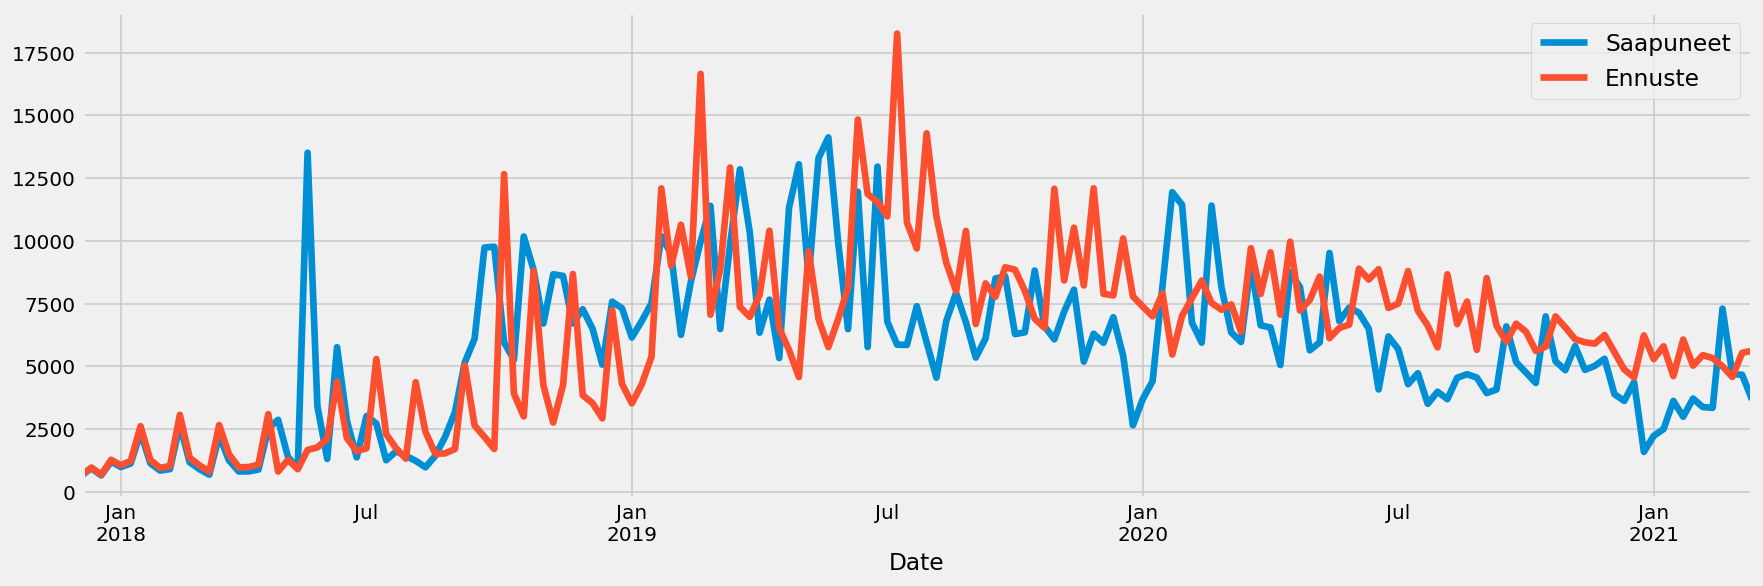

In [11]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [12]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Ennuste,Ennustevirhe
Date,,,
2017-12-10,663,673.756482,-10.756482
2017-12-17,941,970.917299,-29.917299
2017-12-24,658,688.750824,-30.750824
2017-12-31,1206,1279.651994,-73.651994
2018-01-07,991,1065.156498,-74.156498
...,...,...,...
2021-02-14,3353,5332.659250,-1979.659250
2021-02-21,7303,5002.027833,2300.972167
2021-02-28,4699,4580.842960,118.157040


Text(0, 0.5, 'Ennustevirhe')

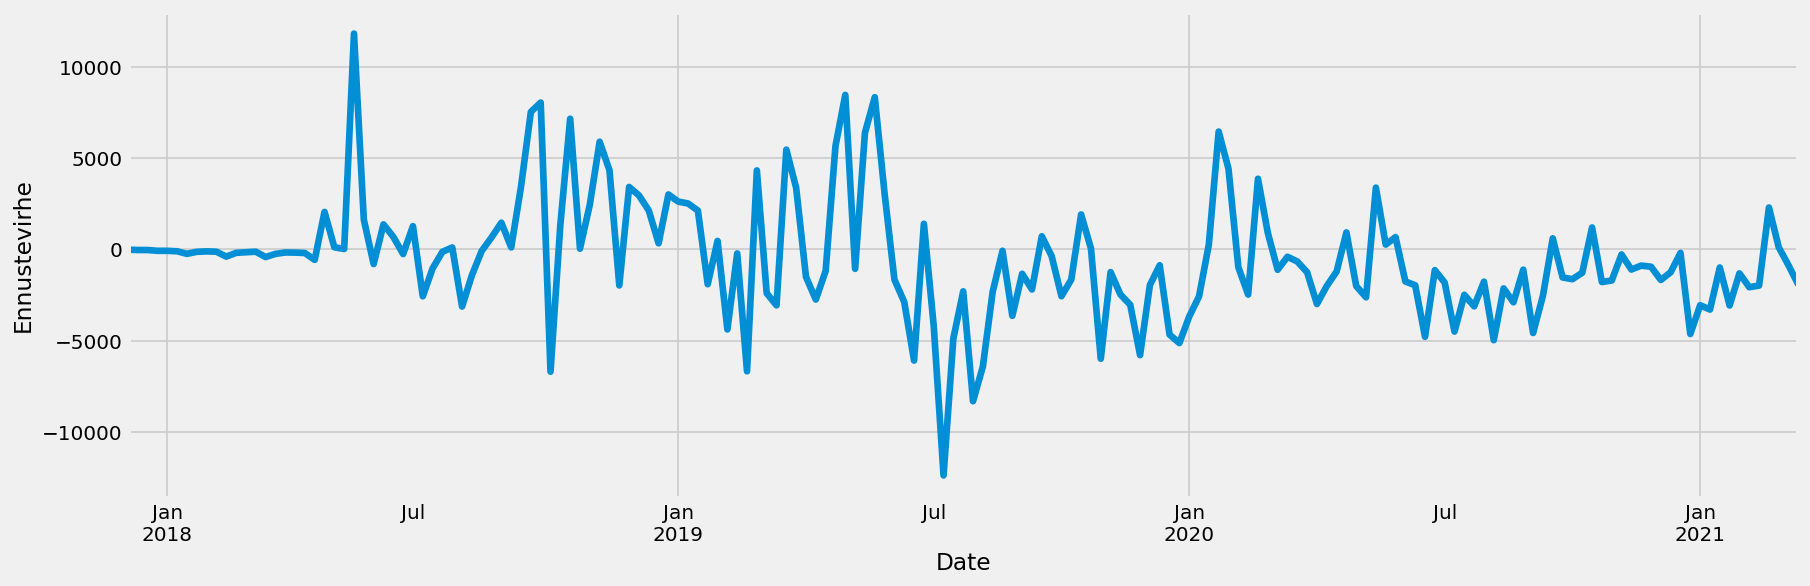

In [13]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

In [14]:
# Mallin hyvyyden arviointi, miten ennusteet menee keskimäärin pieleen?
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean squared error', mean_squared_error(df['Saapuneet'], df['Ennuste']))
print('Mean absolute error', mean_absolute_error(df['Saapuneet'], df['Ennuste']))

Mean squared error 10654596.346012743
Mean absolute error 2341.215251682455


Text(0, 0.5, 'Toteutunut Saapuneet')

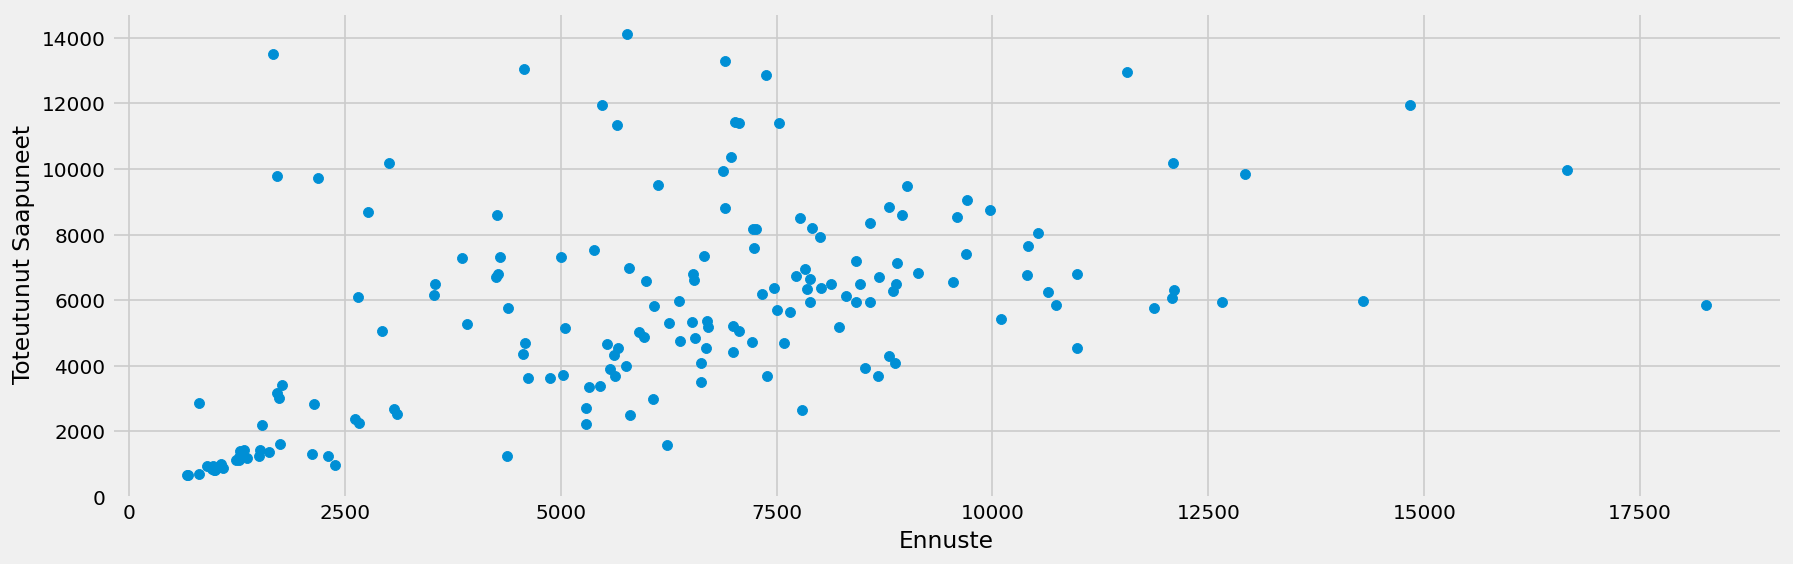

In [15]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Saapuneet'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut Saapuneet')

In [16]:
malli.summary()

Dep. Variable:,Saapuneet,No. Observations:,171
Model:,ExponentialSmoothing,SSE,1821935975.168
Optimized:,True,AIC,2815.037
Trend:,Additive,BIC,2890.437
Seasonal:,Multiplicative,AICC,2824.787
Seasonal Periods:,20,Date:,"Thu, 18 Mar 2021"
Box-Cox:,False,Time:,12:07:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0001,beta,True


In [17]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Ennuste,Ennustevirhe
Date,,,
2021-02-14,3353,5332.659250,-1979.659250
2021-02-21,7303,5002.027833,2300.972167
2021-02-28,4699,4580.842960,118.157040
2021-03-07,4666,5541.077403,-875.077403
2021-03-14,3681,5622.755068,-1941.755068


In [18]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2021-03-21', periods = 12, freq = 'W')

# Ennusteet kuudelle viikolle
ennusteet = malli.forecast(12)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2021-03-21,5245.773704
2021-03-28,5318.696802
2021-04-04,4969.697097
2021-04-11,5026.183992
2021-04-18,5351.656303
2021-04-25,4539.468381
2021-05-02,4092.309172
2021-05-09,4181.612368
2021-05-16,4327.983054
2021-05-23,4076.795585


<AxesSubplot:xlabel='Date'>

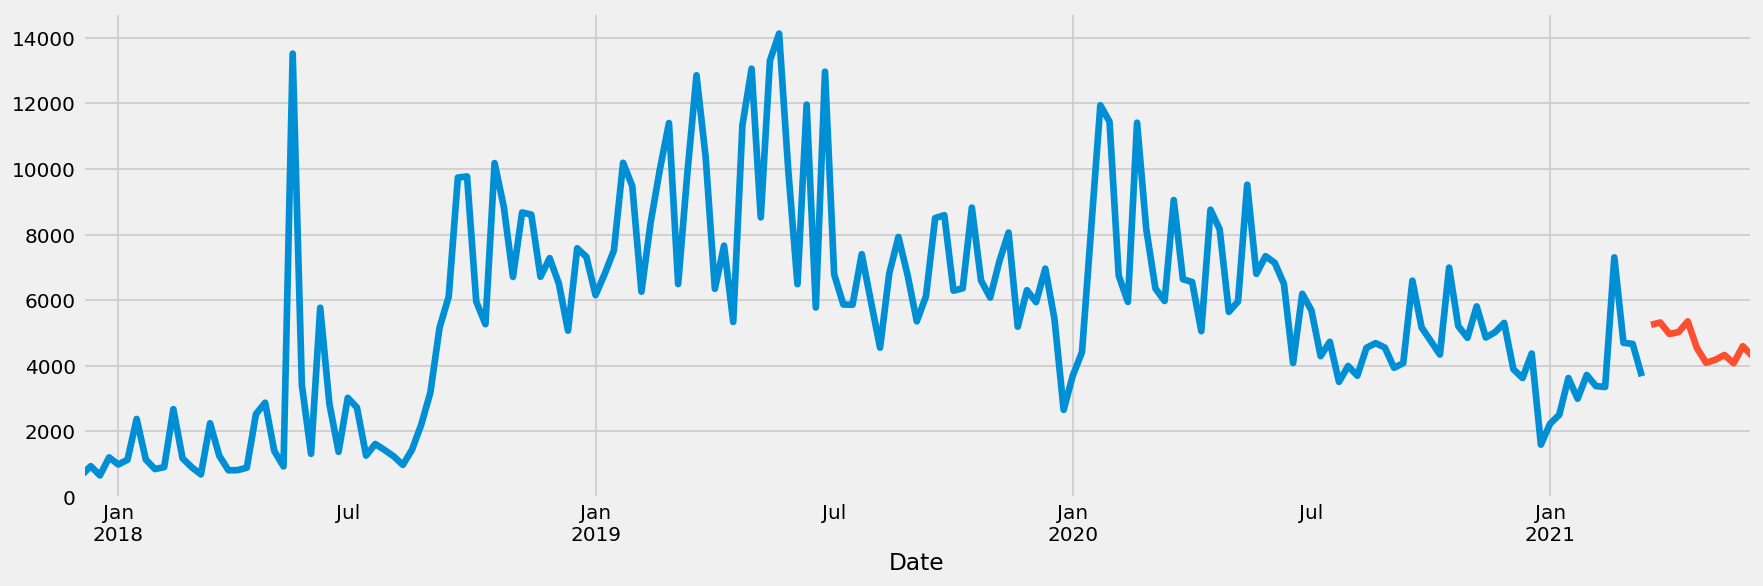

In [19]:
# Viivakaavio havainnoista
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [20]:
# Dataframe, jossa alkuperäinen aikasarja ja lasketut ennusteet
df1 = pd.concat([df, df_ennuste])
df1

,Saapuneet,Ennuste,Ennustevirhe
2017-12-10,663.0,673.756482,-10.756482
2017-12-17,941.0,970.917299,-29.917299
2017-12-24,658.0,688.750824,-30.750824
2017-12-31,1206.0,1279.651994,-73.651994
2018-01-07,991.0,1065.156498,-74.156498
...,...,...,...
2021-05-09,NaN,4181.612368,NaN
2021-05-16,NaN,4327.983054,NaN
2021-05-23,NaN,4076.795585,NaN
2021-05-30,NaN,4595.912859,NaN


In [21]:
malli.params

{'smoothing_level': 0.040357142857142855,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.3427295918367347,
 'damping_trend': nan,
 'initial_level': 5055.333333333333,
 'initial_trend': 82.0175,
 'initial_seasons': array([0.13114862, 0.18614005, 0.13015957, 0.23855994, 0.19603059,
        0.22431755, 0.4703943 , 0.22590004, 0.16813926, 0.18040353,
        0.52973757, 0.23361466, 0.17941448, 0.13609389, 0.44467889,
        0.2488461 , 0.16101807, 0.16200712, 0.17644732, 0.50006594]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

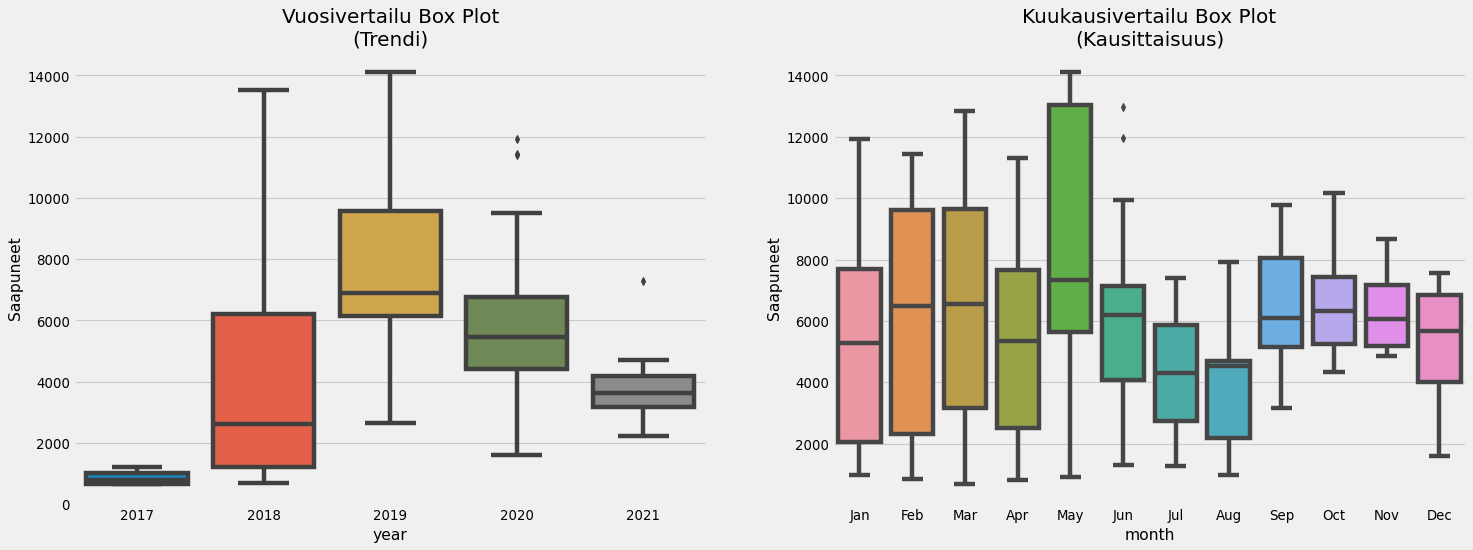

In [22]:
# Visuaalisaatio kausittaisuudesta

import seaborn as sns
# Boxplot kuukausi (kausittainen) ja vuosipohjainen trendi
# Import Data
df = pd.read_excel('Saapuneet puhelut viikkotasolla.xlsx', index_col='Date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Saapuneet', data=df, ax=axes[0])
sns.boxplot(x='month', y='Saapuneet', data=df.loc[~df.year.isin([2017, 2021]), :])

# Set Title
axes[0].set_title('Vuosivertailu Box Plot\n(Trendi)', fontsize=18); 
axes[1].set_title('Kuukausivertailu Box Plot\n(Kausittaisuus)', fontsize=18)
plt.show()